In [1]:
import numpy as np
import matplotlib.pyplot as plt
# (仮の)順伝播の入力を作成
x = np.array([[1.0, -0.5],[0.0, 3.0]])
print(x)
# 順伝播を計算
y = 1 / (1 + np.exp(-x))
print(np.round(y, 3))

[[ 1.  -0.5]
 [ 0.   3. ]]
[[0.731 0.378]
 [0.5   0.953]]


In [2]:
# (仮の)逆伝播の入力を作成
dy = np.ones_like(y)
print(dy)

[[1. 1.]
 [1. 1.]]


In [3]:
# 逆伝播を計算
dx = dy * y * (1-y)
print(np.round(dx, 3))

[[0.197 0.235]
 [0.25  0.045]]


In [4]:
# Sigmoidレイヤの実装
class Sigmoid:
    # 初期化メソッド
    def __init__(self):
        # 順伝播の出力を初期化
        self.out = None
    
    # 順伝播メソッド
    def forward(self, x):
        # 順伝播を計算
        out = 1 / (1 + np.exp(-x))
        
        # 順伝播の出力を保存
        self.out = out
        return out
    
    # 逆伝播メソッド
    def backward(self, dout):
        # 逆伝播を計算
        dx = dout * self.out * (1.0 - self.out)
        return dx
    

In [5]:
# Sigmoidレイヤのインスタンスを作成
layer = Sigmoid()

# (仮の)順伝播の入力を作成
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

# 順伝播を計算
y = layer.forward(x)
print(y)

[[ 1.  -0.5]
 [-2.   3. ]]
[[0.73105858 0.37754067]
 [0.11920292 0.95257413]]


In [6]:
# (仮の)逆伝播の入力を作成
dy = np.ones_like(y)
print(dy)

# 逆伝播を計算
dx = layer.backward(dy)
print(dx)

[[1. 1.]
 [1. 1.]]
[[0.19661193 0.23500371]
 [0.10499359 0.04517666]]


In [7]:
# Sigmoidレイヤのインスタンスを作成
layer = Sigmoid()

# 作図用の順伝播の入力を作成
x_vals = np.arange(-10.0, 10.0, 0.01)

# 順伝播を計算
y_vals = layer.forward(x_vals)
print(np.round(y_vals[:5], 5))
print(np.round(y_vals[-5:], 5))

[5.e-05 5.e-05 5.e-05 5.e-05 5.e-05]
[0.99995 0.99995 0.99995 0.99995 0.99995]


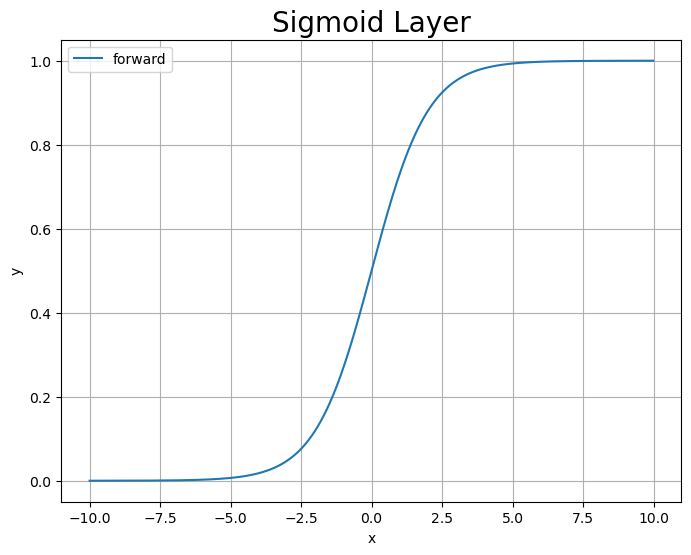

In [8]:
# 順伝播のグラフを作成
plt.figure(figsize=(8, 6)) # 図の設定
plt.plot(x_vals, y_vals, label='forward') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('y') # y軸ラベル
plt.title('Sigmoid Layer', fontsize=20) # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show()

In [9]:
# 作図用の逆伝播の入力を作成
dy_vals = np.ones_like(y_vals)

# 逆伝播を計算
dx_vals = layer.backward(dy_vals)
print(np.round(dx_vals[:5], 5))  # 前から5つ
print(np.round(dx_vals[-5:], 5)) # 後から5つ

[5.e-05 5.e-05 5.e-05 5.e-05 5.e-05]
[5.e-05 5.e-05 5.e-05 5.e-05 5.e-05]


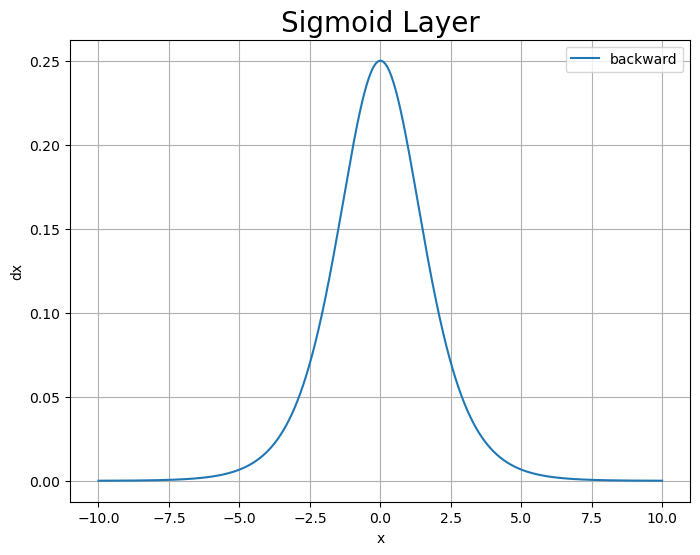

In [10]:
# 逆伝播のグラフを作成
plt.figure(figsize=(8, 6)) # 図の設定
plt.plot(x_vals, dx_vals, label='backward') # 折れ線グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('dx') # y軸ラベル
plt.title('Sigmoid Layer', fontsize=20) # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show()

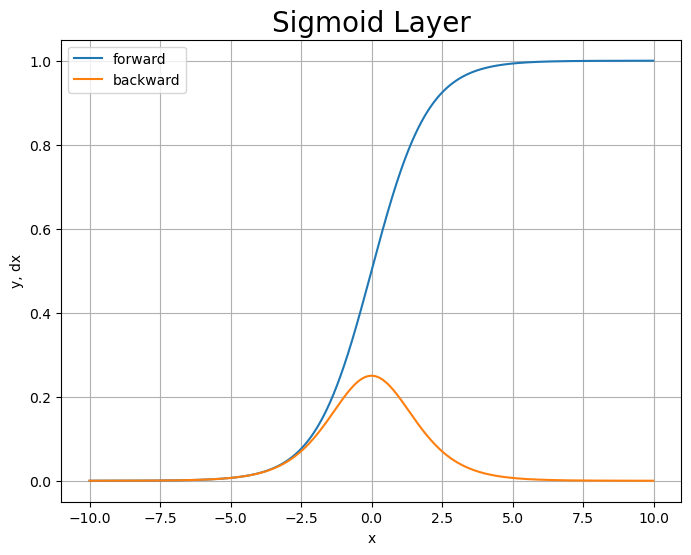

In [11]:
# Sigmoidレイヤのグラフを作成
plt.figure(figsize=(8, 6)) # 図の設定
plt.plot(x_vals, y_vals, label='forward') # シグモイド関数
plt.plot(x_vals, dx_vals, label='backward') # 勾配
plt.xlabel('x') # x軸ラベル
plt.ylabel('y, dx') # y軸ラベル
plt.title('Sigmoid Layer', fontsize=20) # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show()